In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('train.csv',usecols = ['SalePrice','MSSubClass','MSZoning','LotFrontage','LotArea','Street','YearBuilt',
                                        'LotShape','1stFlrSF','2ndFlrSF']).dropna()

In [3]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,YearBuilt,1stFlrSF,2ndFlrSF,SalePrice
0,60,RL,65.0,8450,Pave,Reg,2003,856,854,208500
1,20,RL,80.0,9600,Pave,Reg,1976,1262,0,181500
2,60,RL,68.0,11250,Pave,IR1,2001,920,866,223500
3,70,RL,60.0,9550,Pave,IR1,1915,961,756,140000
4,60,RL,84.0,14260,Pave,IR1,2000,1145,1053,250000


In [4]:
df.shape

(1201, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1201 entries, 0 to 1459
Data columns (total 10 columns):
MSSubClass     1201 non-null int64
MSZoning       1201 non-null object
LotFrontage    1201 non-null float64
LotArea        1201 non-null int64
Street         1201 non-null object
LotShape       1201 non-null object
YearBuilt      1201 non-null int64
1stFlrSF       1201 non-null int64
2ndFlrSF       1201 non-null int64
SalePrice      1201 non-null int64
dtypes: float64(1), int64(6), object(3)
memory usage: 103.2+ KB


In [7]:
for i in df.columns:
    print('{} with unique values are {}'.format(i, len(df[i].unique())))

MSSubClass with unique values are 15
MSZoning with unique values are 5
LotFrontage with unique values are 110
LotArea with unique values are 869
Street with unique values are 2
LotShape with unique values are 4
YearBuilt with unique values are 112
1stFlrSF with unique values are 678
2ndFlrSF with unique values are 368
SalePrice with unique values are 597


In [8]:
import datetime
datetime.datetime.now().year

2020

In [9]:
df['Total_Years'] = datetime.datetime.now().year-df['YearBuilt']

In [10]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,YearBuilt,1stFlrSF,2ndFlrSF,SalePrice,Total_Years
0,60,RL,65.0,8450,Pave,Reg,2003,856,854,208500,17
1,20,RL,80.0,9600,Pave,Reg,1976,1262,0,181500,44
2,60,RL,68.0,11250,Pave,IR1,2001,920,866,223500,19
3,70,RL,60.0,9550,Pave,IR1,1915,961,756,140000,105
4,60,RL,84.0,14260,Pave,IR1,2000,1145,1053,250000,20


In [13]:
df.drop('YearBuilt', axis = 1, inplace = True)

In [14]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', '1stFlrSF', '2ndFlrSF', 'SalePrice', 'Total_Years'],
      dtype='object')

In [15]:
cat_features = ['MSSubClass','MSZoning','Street','LotShape']
out_feature = 'SalePrice'

In [16]:
from sklearn.preprocessing import LabelEncoder
lbl_encoders={}
for feature in cat_features:
    lbl_encoders[feature] = LabelEncoder()
    df[feature]=lbl_encoders[feature].fit_transform(df[feature])

In [17]:
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,1stFlrSF,2ndFlrSF,SalePrice,Total_Years
0,5,3,65.0,8450,1,3,856,854,208500,17
1,0,3,80.0,9600,1,3,1262,0,181500,44
2,5,3,68.0,11250,1,0,920,866,223500,19
3,6,3,60.0,9550,1,0,961,756,140000,105
4,5,3,84.0,14260,1,0,1145,1053,250000,20
5,4,3,85.0,14115,1,0,796,566,143000,27
6,0,3,75.0,10084,1,3,1694,0,307000,16
8,4,4,51.0,6120,1,3,1022,752,129900,89
9,14,3,50.0,7420,1,3,1077,0,118000,81
10,0,3,70.0,11200,1,3,1040,0,129500,55


In [18]:
## Stacking and converting into Tensors
cat_features = np.stack([df['MSSubClass'],df['MSZoning'],df['Street'],df['LotShape']],1)
cat_features

array([[5, 3, 1, 3],
       [0, 3, 1, 3],
       [5, 3, 1, 0],
       ...,
       [6, 3, 1, 3],
       [0, 3, 1, 3],
       [0, 3, 1, 3]], dtype=int64)

In [19]:
### Convert numpy to tensors

import torch
cat_features = torch.tensor(cat_features,dtype = torch.int64)
cat_features

tensor([[5, 3, 1, 3],
        [0, 3, 1, 3],
        [5, 3, 1, 0],
        ...,
        [6, 3, 1, 3],
        [0, 3, 1, 3],
        [0, 3, 1, 3]])

In [20]:
## Create Continuous Variable
cont_features = []
for i in df.columns:
    if i in ['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'SalePrice']:
        pass
    else:
        cont_features.append(i)

In [21]:
cont_features

['LotFrontage', 'LotArea', '1stFlrSF', '2ndFlrSF', 'Total_Years']

In [22]:
### Stacking continous variable into a tensor
cont_values = np.stack([df[i].values for i in cont_features],axis = 1)
cont_values = torch.tensor(cont_values,dtype = torch.float)
cont_values

tensor([[   65.,  8450.,   856.,   854.,    17.],
        [   80.,  9600.,  1262.,     0.,    44.],
        [   68., 11250.,   920.,   866.,    19.],
        ...,
        [   66.,  9042.,  1188.,  1152.,    79.],
        [   68.,  9717.,  1078.,     0.,    70.],
        [   75.,  9937.,  1256.,     0.,    55.]])

In [23]:
cont_values.dtype

torch.float32

In [24]:
### Dependent Feature
y = torch.tensor(df['SalePrice'].values,dtype = torch.float).reshape(-1,1)
y

tensor([[208500.],
        [181500.],
        [223500.],
        ...,
        [266500.],
        [142125.],
        [147500.]])

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1201 entries, 0 to 1459
Data columns (total 10 columns):
MSSubClass     1201 non-null int64
MSZoning       1201 non-null int32
LotFrontage    1201 non-null float64
LotArea        1201 non-null int64
Street         1201 non-null int32
LotShape       1201 non-null int32
1stFlrSF       1201 non-null int64
2ndFlrSF       1201 non-null int64
SalePrice      1201 non-null int64
Total_Years    1201 non-null int64
dtypes: float64(1), int32(3), int64(6)
memory usage: 89.1 KB


In [26]:
df.shape

(1201, 10)

In [27]:
cat_features.shape , cont_values.shape , y.shape

(torch.Size([1201, 4]), torch.Size([1201, 5]), torch.Size([1201, 1]))

In [28]:
##### Embedding size for Categorical Features
cat_dims = [len(df[col].unique()) for col in ['MSSubClass', 'MSZoning', 'Street', 'LotShape']]

In [29]:
cat_dims

[15, 5, 2, 4]

In [31]:
### Thumb rule - Output dimension should be set based on input dimensions min(50,feature dimensions / 2)
embedding_dim = [(x, min(50, (x+1)//2)) for x in cat_dims]

In [32]:
embedding_dim

[(15, 8), (5, 3), (2, 1), (4, 2)]

In [35]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [37]:
embeded_representation = nn.ModuleList([nn.Embedding(inp,out) for inp,out in embedding_dim])
embeded_representation

ModuleList(
  (0): Embedding(15, 8)
  (1): Embedding(5, 3)
  (2): Embedding(2, 1)
  (3): Embedding(4, 2)
)

In [38]:
cat_features

tensor([[5, 3, 1, 3],
        [0, 3, 1, 3],
        [5, 3, 1, 0],
        ...,
        [6, 3, 1, 3],
        [0, 3, 1, 3],
        [0, 3, 1, 3]])

In [39]:
cat_featuresz = cat_features[:4]
cat_featuresz

tensor([[5, 3, 1, 3],
        [0, 3, 1, 3],
        [5, 3, 1, 0],
        [6, 3, 1, 0]])

In [41]:
pd.set_option('display.max_rows', 500)
embedding_val = []
for i,e in enumerate(embeded_representation):
    embedding_val.append(e(cat_features[:,i]))

In [42]:
embedding_val

[tensor([[-0.0223, -0.9490, -0.4397,  ..., -1.8675,  0.9810, -0.5719],
         [-2.3777,  2.2940, -0.9833,  ...,  0.9947,  0.8019,  0.0078],
         [-0.0223, -0.9490, -0.4397,  ..., -1.8675,  0.9810, -0.5719],
         ...,
         [-1.2471, -0.1914,  0.3486,  ...,  0.8198,  1.1756, -0.7620],
         [-2.3777,  2.2940, -0.9833,  ...,  0.9947,  0.8019,  0.0078],
         [-2.3777,  2.2940, -0.9833,  ...,  0.9947,  0.8019,  0.0078]],
        grad_fn=<EmbeddingBackward>),
 tensor([[-0.1963,  0.3345, -0.4813],
         [-0.1963,  0.3345, -0.4813],
         [-0.1963,  0.3345, -0.4813],
         ...,
         [-0.1963,  0.3345, -0.4813],
         [-0.1963,  0.3345, -0.4813],
         [-0.1963,  0.3345, -0.4813]], grad_fn=<EmbeddingBackward>),
 tensor([[-0.6703],
         [-0.6703],
         [-0.6703],
         ...,
         [-0.6703],
         [-0.6703],
         [-0.6703]], grad_fn=<EmbeddingBackward>),
 tensor([[-1.8599, -1.0551],
         [-1.8599, -1.0551],
         [ 1.3664, -0.321

In [43]:
z = torch.cat(embedding_val, 1)

In [44]:
z

tensor([[-0.0223, -0.9490, -0.4397,  ..., -0.6703, -1.8599, -1.0551],
        [-2.3777,  2.2940, -0.9833,  ..., -0.6703, -1.8599, -1.0551],
        [-0.0223, -0.9490, -0.4397,  ..., -0.6703,  1.3664, -0.3214],
        ...,
        [-1.2471, -0.1914,  0.3486,  ..., -0.6703, -1.8599, -1.0551],
        [-2.3777,  2.2940, -0.9833,  ..., -0.6703, -1.8599, -1.0551],
        [-2.3777,  2.2940, -0.9833,  ..., -0.6703, -1.8599, -1.0551]],
       grad_fn=<CatBackward>)

In [45]:
## Implement DropOut
dropout = nn.Dropout(.4)

In [46]:
final_embed = dropout(z)
final_embed

tensor([[-0.0372, -1.5817, -0.7328,  ..., -1.1172, -3.0999, -1.7586],
        [-0.0000,  3.8233, -1.6388,  ..., -0.0000, -3.0999, -1.7586],
        [-0.0000, -1.5817, -0.7328,  ..., -1.1172,  2.2773, -0.0000],
        ...,
        [-0.0000, -0.3190,  0.0000,  ..., -0.0000, -3.0999, -1.7586],
        [-3.9628,  3.8233, -0.0000,  ..., -0.0000, -3.0999, -0.0000],
        [-0.0000,  3.8233, -1.6388,  ..., -0.0000, -0.0000, -1.7586]],
       grad_fn=<MulBackward0>)

In [68]:
##### Create a forward neural network
class ForwardNN(nn.Module):
    
    def __init__(self, embedding_dim, n_cont, out_sz, layers, p=0.5):
        super().__init__()
        self.embeds = nn.ModuleList([nn.Embedding(inp,out) for inp,out in embedding_dim])
        self.emb_drop = nn.Dropout(p)
        self.bn_cont = nn.BatchNorm1d(n_cont)
        
        layerlist = []
        n_emb = sum((out for inp,out in embedding_dim))
        n_in = n_emb + n_cont
        
        for i in layers:
            layerlist.append(nn.Linear(n_in,i))
            layerlist.append(nn.ReLU(inplace = True))
            layerlist.append(nn.BatchNorm1d(i))
            layerlist.append(nn.Dropout(p))
            n_in = i
        layerlist.append(nn.Linear(layers[-1],out_sz))
        
        self.layers = nn.Sequential(*layerlist)
        
    def Forward(self, x_cat, x_cont):
        embeddings = []
        for i, e in enumerate(self.embeds):
            embeddings.append(e(x_cat[:,i]))
        x = torch.cat(embeddings,1)
        x = self.emb_drop(x)
        
        x_cont = self.bn_cont(x_cont)
        x = torch.cat([x, x_cont],1)
        x = self.layers(x)
        return x
            

In [69]:
torch.manual_seed(100)
model = ForwardNN(embedding_dim, len(cont_features),1,[100,50],p=0.4)

In [70]:
model

ForwardNN(
  (embeds): ModuleList(
    (0): Embedding(15, 8)
    (1): Embedding(5, 3)
    (2): Embedding(2, 1)
    (3): Embedding(4, 2)
  )
  (emb_drop): Dropout(p=0.4)
  (bn_cont): BatchNorm1d(5, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=19, out_features=100, bias=True)
    (1): ReLU(inplace)
    (2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4)
    (4): Linear(in_features=100, out_features=50, bias=True)
    (5): ReLU(inplace)
    (6): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4)
    (8): Linear(in_features=50, out_features=1, bias=True)
  )
)

## Define Loss and Optimizer

In [71]:
loss_function=nn.MSELoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.01)

In [72]:
df.shape

(1201, 10)

In [73]:
cont_values

tensor([[   65.,  8450.,   856.,   854.,    17.],
        [   80.,  9600.,  1262.,     0.,    44.],
        [   68., 11250.,   920.,   866.,    19.],
        ...,
        [   66.,  9042.,  1188.,  1152.,    79.],
        [   68.,  9717.,  1078.,     0.,    70.],
        [   75.,  9937.,  1256.,     0.,    55.]])

In [74]:
cont_values.shape

torch.Size([1201, 5])

In [75]:
cat_features.shape

torch.Size([1201, 4])

In [76]:
batch_size=1200
test_size=int(batch_size*0.15)
train_categorical=cat_features[:batch_size-test_size]
test_categorical=cat_features[batch_size-test_size:batch_size]
train_cont=cont_values[:batch_size-test_size]
test_cont=cont_values[batch_size-test_size:batch_size]
y_train=y[:batch_size-test_size]
y_test=y[batch_size-test_size:batch_size]

In [77]:
len(train_categorical),len(test_categorical),len(train_cont),len(test_cont),len(y_train),len(y_test)

(1020, 180, 1020, 180, 1020, 180)

In [78]:
train_categorical.shape , train_cont.shape

(torch.Size([1020, 4]), torch.Size([1020, 5]))

In [79]:
epochs=5000
final_losses=[]
for i in range(epochs):
    i=i+1
    y_pred=model.Forward(train_categorical,train_cont)
    loss=torch.sqrt(loss_function(y_pred,y_train)) ### RMSE
    final_losses.append(loss)
    if i%10==1:
        print("Epoch number: {} and the loss : {}".format(i,loss.item()))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch number: 1 and the loss : 200496.75
Epoch number: 11 and the loss : 200494.890625
Epoch number: 21 and the loss : 200491.390625
Epoch number: 31 and the loss : 200485.46875
Epoch number: 41 and the loss : 200477.578125
Epoch number: 51 and the loss : 200466.296875
Epoch number: 61 and the loss : 200452.25
Epoch number: 71 and the loss : 200434.859375
Epoch number: 81 and the loss : 200414.6875
Epoch number: 91 and the loss : 200389.25
Epoch number: 101 and the loss : 200364.28125
Epoch number: 111 and the loss : 200333.921875
Epoch number: 121 and the loss : 200299.984375
Epoch number: 131 and the loss : 200261.109375
Epoch number: 141 and the loss : 200215.640625
Epoch number: 151 and the loss : 200171.609375
Epoch number: 161 and the loss : 200123.6875
Epoch number: 171 and the loss : 200073.5
Epoch number: 181 and the loss : 200012.265625
Epoch number: 191 and the loss : 199945.59375
Epoch number: 201 and the loss : 199882.96875
Epoch number: 211 and the loss : 199827.765625
Ep

Epoch number: 1771 and the loss : 154770.203125
Epoch number: 1781 and the loss : 153869.640625
Epoch number: 1791 and the loss : 153239.9375
Epoch number: 1801 and the loss : 153147.9375
Epoch number: 1811 and the loss : 152618.171875
Epoch number: 1821 and the loss : 152120.734375
Epoch number: 1831 and the loss : 151896.234375
Epoch number: 1841 and the loss : 151689.03125
Epoch number: 1851 and the loss : 150947.71875
Epoch number: 1861 and the loss : 150388.96875
Epoch number: 1871 and the loss : 150680.78125
Epoch number: 1881 and the loss : 149896.34375
Epoch number: 1891 and the loss : 149370.3125
Epoch number: 1901 and the loss : 148721.125
Epoch number: 1911 and the loss : 148218.34375
Epoch number: 1921 and the loss : 147567.734375
Epoch number: 1931 and the loss : 147141.6875
Epoch number: 1941 and the loss : 146584.03125
Epoch number: 1951 and the loss : 147090.5625
Epoch number: 1961 and the loss : 145944.828125
Epoch number: 1971 and the loss : 145485.703125
Epoch number

Epoch number: 3501 and the loss : 68398.140625
Epoch number: 3511 and the loss : 70066.984375
Epoch number: 3521 and the loss : 68045.2265625
Epoch number: 3531 and the loss : 68914.6484375
Epoch number: 3541 and the loss : 66996.1484375
Epoch number: 3551 and the loss : 67224.59375
Epoch number: 3561 and the loss : 67100.75
Epoch number: 3571 and the loss : 67218.2265625
Epoch number: 3581 and the loss : 64760.9296875
Epoch number: 3591 and the loss : 66108.2109375
Epoch number: 3601 and the loss : 67009.765625
Epoch number: 3611 and the loss : 64641.40625
Epoch number: 3621 and the loss : 63370.703125
Epoch number: 3631 and the loss : 64394.18359375
Epoch number: 3641 and the loss : 63245.265625
Epoch number: 3651 and the loss : 62538.828125
Epoch number: 3661 and the loss : 62468.32421875
Epoch number: 3671 and the loss : 61157.45703125
Epoch number: 3681 and the loss : 60949.7109375
Epoch number: 3691 and the loss : 60463.7421875
Epoch number: 3701 and the loss : 60725.12109375
Epo

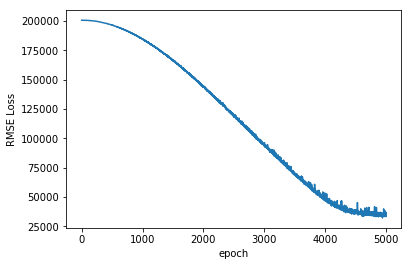

In [80]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(range(epochs), final_losses)
plt.ylabel('RMSE Loss')
plt.xlabel('epoch');

In [82]:
#### Validate the Test Data
y_pred=""
with torch.no_grad():
    y_pred=model.Forward(test_categorical,test_cont)
    loss=torch.sqrt(loss_function(y_pred,y_test))
print('RMSE: {}'.format(loss))

RMSE: 42141.9609375


In [83]:
data_verify=pd.DataFrame(y_test.tolist(),columns=["Test"])

In [84]:
data_predicted=pd.DataFrame(y_pred.tolist(),columns=["Prediction"])

In [85]:
data_predicted

,Prediction
0,148717.765625
1,166204.281250
2,185142.296875
3,202096.062500
4,139530.406250
5,184327.437500
6,251380.125000
7,297111.218750
8,145704.890625
9,446643.406250


In [86]:
final_output=pd.concat([data_verify,data_predicted],axis=1)
final_output['Difference']=final_output['Test']-final_output['Prediction']
final_output.head()

,Test,Prediction,Difference
0,130000.0,148717.765625,-18717.765625
1,138887.0,166204.281250,-27317.281250
2,175500.0,185142.296875,-9642.296875
3,195000.0,202096.062500,-7096.062500
4,142500.0,139530.406250,2969.593750
